In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

### We start off by loading the data

In [2]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')
test_PassengerId = test_df['PassengerId']

### Getting some info about the trainig and testing data

In [3]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

# Cleaning

In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
mean_age = train_df['Age'].mean()
median_age = train_df['Age'].median()
mode_age = train_df['Age'].mode()
print(f'Mean age   = {mean_age}')
print(f'Median age = {median_age}')
print(f'Mode age = {mode_age}')

Mean age   = 29.69911764705882
Median age = 28.0
Mode age = 0    24.0
Name: Age, dtype: float64


<AxesSubplot: xlabel='Age', ylabel='Count'>

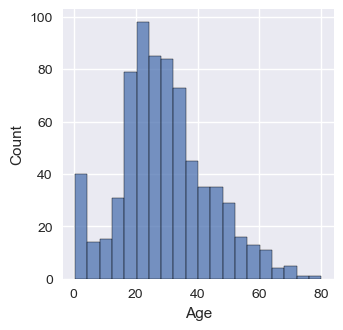

In [8]:
plt.figure(figsize=(3.5,3.5))
sns.histplot(x = 'Age', data = train_df)

<AxesSubplot: xlabel='Embarked', ylabel='count'>

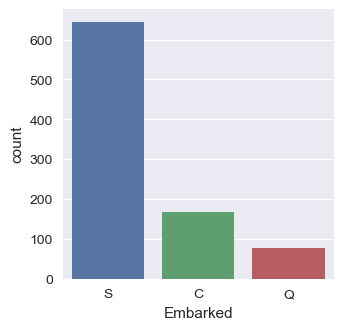

In [9]:
plt.figure(figsize=(3.5,3.5))
sns.countplot(x= 'Embarked', data = train_df)

In [10]:
mean_fare = test_df['Fare'].mean()
median_fare = test_df['Fare'].median()
print(f'Mean Fare = {mean_fare}')
print(f'Median Fare = {median_fare}')

Mean Fare = 35.6271884892086
Median Fare = 14.4542


<Figure size 400x400 with 0 Axes>

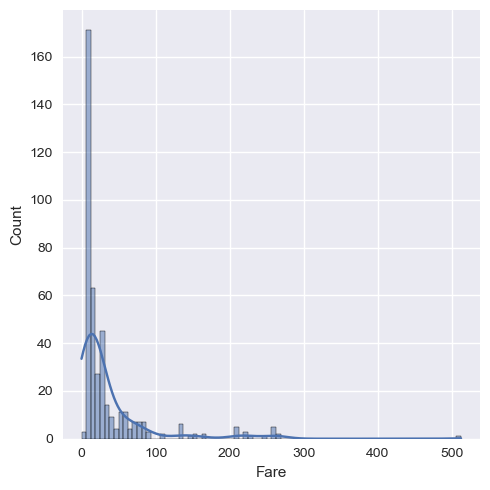

In [11]:
plt.figure(figsize=(4,4))
sns.displot(x = 'Fare', data = test_df, kde = True)

In [12]:
def clean (data):
    #dropping unwanted columns
    data.drop(columns=['Name','Cabin','Ticket','PassengerId'], inplace = True)
    
    #filling missing values in Age column
    data['Age'].fillna(train_df['Age'].mean(), inplace = True)
    
    #filling missing values in Embarked column
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)
    
    #filling missing values in Fare column
    data['Fare'].fillna(train_df['Fare'].median(), inplace = True)
    
    #asserting that there is no missing values left
    for col in data:
        assert data[col].isnull().sum() == 0
    
    return data

### Here we imputed the values from the train data to prevent data lekage

### Also we imputed the age based on other columns which are Sex and Pclass

In [13]:
train_df = clean(train_df)
test_df  = clean(test_df)

In [14]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Showing the data after cleaning

# Encoding categorical columns

In [15]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)

train_cat = train_df.loc[:,['Sex','Embarked']]
test_cat = test_df.loc[:,['Sex','Embarked']]

train_cat = ohe.fit_transform(train_cat)
train_cat = pd.DataFrame(train_cat)

test_cat = ohe.fit_transform(test_cat)
test_cat = pd.DataFrame(test_cat)

train_cat.columns = ['Female','Male','C','Q','S']
train_df = train_df.join(train_cat)

test_cat.columns = ['Female','Male','C','Q','S']
test_df = test_df.join(test_cat)

In [16]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Female,Male,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0.0,1.0,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,1.0,0.0,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,1.0,0.0,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,1.0,0.0,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,S,0.0,1.0,0.0,0.0,1.0


In [17]:
train_df.drop(columns=['Sex','Embarked','Female','Q'], inplace = True)
test_df.drop(columns=['Sex','Embarked','Female','Q'], inplace = True)

### Heading the data after encoding and scaling

In [18]:
display(train_df.head())
print('-'*55)
display(test_df.head())

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,C,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,1.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


-------------------------------------------------------


,Pclass,Age,SibSp,Parch,Fare,Male,C,S
0,3,34.5,0,0,7.8292,1.0,0.0,0.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,1.0,0.0,0.0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0


# Splitting the data

In [19]:
from sklearn.model_selection import train_test_split
#deviding the trining set into train and validation 
X = train_df.drop('Survived', axis = 1)
Y = train_df['Survived']
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size= 0.2, random_state= 42)

# Scaling numerical columns

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['Age','Fare']
for col in cols:
    x_train[col] = scaler.fit_transform(x_train[col].values.reshape(-1,1))
    x_val[col] = scaler.transform(x_val[col].values.reshape(-1,1))
    test_df[col] = scaler.transform(test_df[col].values.reshape(-1,1))

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
#fitting the model
log_reg.fit(x_train,y_train)
#predicting the lables for validation data
y_val_pred_log = log_reg.predict(x_val)

# Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 1170, max_depth = 7, min_samples_split = 6, min_samples_leaf = 6
                             ,max_features = 'auto', random_state = 1, verbose = 1)
RFC.fit(x_train,y_train)
y_val_pred_rfc = RFC.predict(x_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1170 out of 1170 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1170 out of 1170 | elapsed:    0.0s finished


# Calculating accuracy on validation data

In [23]:
from sklearn.metrics import accuracy_score
logistic_acc = accuracy_score(y_val, y_val_pred_log)
random_acc = accuracy_score(y_val, y_val_pred_rfc)

print(f'Logistic regression accuracy = {logistic_acc}')
print(f'Random forests classifier accuracy = {random_acc}')

Logistic regression accuracy = 0.8100558659217877
Random forests classifier accuracy = 0.8268156424581006


### Looks like RF classifier has higher accuracy so i am going with it

In [24]:
final = RFC.predict(test_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1170 out of 1170 | elapsed:    0.0s finished


In [25]:
df = pd.DataFrame({'PassengerId':test_PassengerId.values, 'Survived': final})

In [26]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [27]:
df['Survived'].value_counts()

0    283
1    135
Name: Survived, dtype: int64

In [28]:
df.to_csv('Final.csv',index=False)